# 03 - Sparse-Aware Kalman Filter (Thresholding)
This notebook implements a modified Kalman filter that applies thresholding to enforce sparsity in the estimated state vector.


## 1. Load Input Data
Load previous simulation results: true state `x_true`, measurements `y`, observation matrix `H`.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
x_true = np.load("../data/x_true.npy")
y = np.load("../data/y.npy")
H = np.load("../data/H.npy")

n_timesteps, n_states = x_true.shape
n_measurements = y.shape[1]


## 2. Initialize Kalman Filter
Use the same model as in the standard implementation, but apply thresholding after the update step.


In [2]:
A = np.eye(n_states)
Q = 0.01 * np.eye(n_states)
R = 0.1 * np.eye(n_measurements)
I = np.eye(n_states)

x_est_thresh = np.zeros((n_timesteps, n_states))
P = np.eye(n_states)
tau = 0.2  # threshold


## 3. Run Kalman Filter with Hard Thresholding
Set small values to zero after each update.


In [3]:
for t in range(1, n_timesteps):
    # Predict
    x_pred = A @ x_est_thresh[t-1]
    P = A @ P @ A.T + Q

    # Update
    S = H @ P @ H.T + R
    K = P @ H.T @ np.linalg.inv(S)
    x_update = x_pred + K @ (y[t] - H @ x_pred)

    # Thresholding step
    x_update[np.abs(x_update) < tau] = 0
    x_est_thresh[t] = x_update

    # Update covariance
    P = (I - K @ H) @ P


/var/folders/k0/6lmp7mrd3p93h1srd2mv_qt00000gn/T/ipykernel_72712/2110485938.py:4: RuntimeWarning: divide by zero encountered in matmul
  P = A @ P @ A.T + Q
/var/folders/k0/6lmp7mrd3p93h1srd2mv_qt00000gn/T/ipykernel_72712/2110485938.py:4: RuntimeWarning: overflow encountered in matmul
  P = A @ P @ A.T + Q
/var/folders/k0/6lmp7mrd3p93h1srd2mv_qt00000gn/T/ipykernel_72712/2110485938.py:4: RuntimeWarning: invalid value encountered in matmul
  P = A @ P @ A.T + Q
/var/folders/k0/6lmp7mrd3p93h1srd2mv_qt00000gn/T/ipykernel_72712/2110485938.py:7: RuntimeWarning: divide by zero encountered in matmul
  S = H @ P @ H.T + R
/var/folders/k0/6lmp7mrd3p93h1srd2mv_qt00000gn/T/ipykernel_72712/2110485938.py:7: RuntimeWarning: overflow encountered in matmul
  S = H @ P @ H.T + R
/var/folders/k0/6lmp7mrd3p93h1srd2mv_qt00000gn/T/ipykernel_72712/2110485938.py:7: RuntimeWarning: invalid value encountered in matmul
  S = H @ P @ H.T + R
/var/folders/k0/6lmp7mrd3p93h1srd2mv_qt00000gn/T/ipykernel_72712/2110485

## 4. Save Estimated States
Save output to file for later use.


In [4]:
np.save("../data/x_est_thresh.npy", x_est_thresh)


## 5. Visualize Sparse-Aware Estimation vs True States


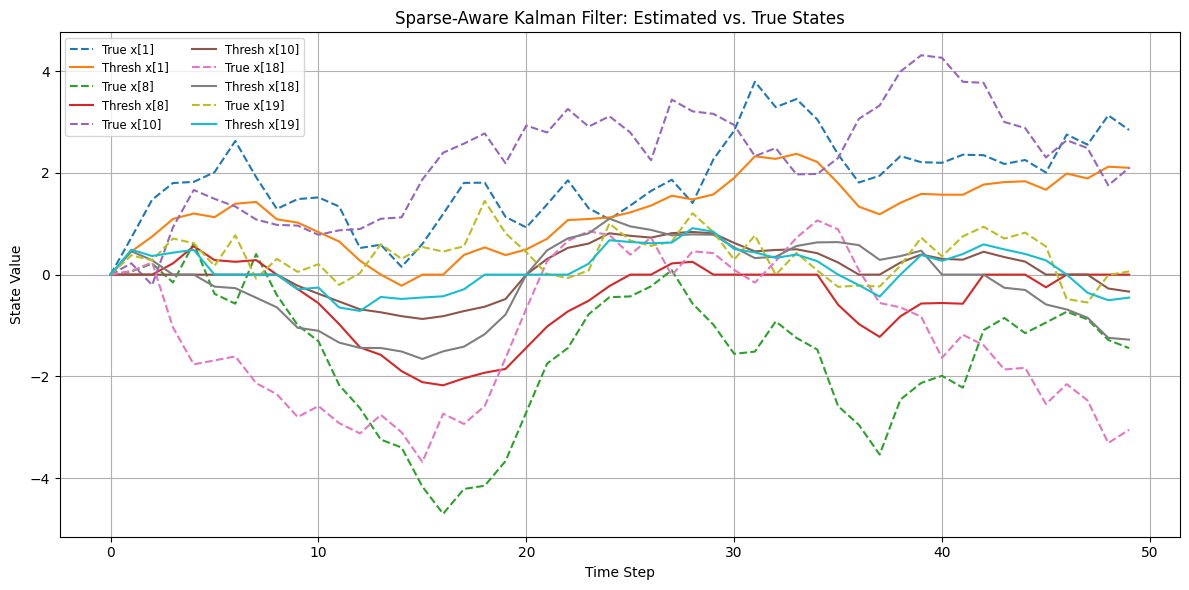

In [5]:
non_zero_indices = np.any(x_true != 0, axis=0).nonzero()[0]

plt.figure(figsize=(12, 6))
for i in non_zero_indices:
    plt.plot(x_true[:, i], '--', label=f"True x[{i}]")
    plt.plot(x_est_thresh[:, i], '-', label=f"Thresh x[{i}]")
plt.title("Sparse-Aware Kalman Filter: Estimated vs. True States")
plt.xlabel("Time Step")
plt.ylabel("State Value")
plt.legend(ncol=2, fontsize="small")
plt.grid(True)
plt.tight_layout()
plt.savefig("../plots/sparse_kf_est_vs_true.png")
plt.show()
